In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('Table_Optimal2015-08-16.csv')

In [12]:
print df.dtypes

$c^{1}$       int64
$c^{2}$       int64
$c^{3}$       int64
$c^{4}$       int64
$c^{5}$       int64
$y^{1}$       int64
$y^{2}$       int64
$y^{3}$       int64
$y^{4}$       int64
$y^{5}$       int64
$t$           int64
ExpValue    float64
$d_{0}$       int64
$d_{1}$       int64
$d_{2}$       int64
$d_{3}$       int64
$d_{4}$       int64
$d_{5}$       int64
$d_{6}$       int64
$d_{7}$       int64
$d_{8}$       int64
$d_{9}$       int64
$d_{10}$      int64
dtype: object


In [13]:
df_Series2 = pd.DataFrame(index=['$d_{0}$'], columns=range(11))

for j in df.groupby('$d_{0}$').size().index:
    df_Series2[j] = df.groupby('$d_{0}$').size()[j]

print df_Series2.to_latex()

\begin{tabular}{lrrlrlrlrlll}
\toprule
{} &     0  &    1  &   2  &    3  &   4  &    5  &   6  &   7  &   8  &   9  &   10 \\
\midrule
\$d\_\{0\}\$ &  61926 &  1461 &  NaN &  4829 &  NaN &  6746 &  NaN &  641 &  NaN &  NaN &  NaN \\
\bottomrule
\end{tabular}



In [14]:
df_Series = pd.DataFrame(index=df.dtypes[13:].index, columns=[0, 1,  2, 3])

for i in df.dtypes[13:].index:
    for j in df.groupby(i).size().index:
        df_Series[j][i] = df.groupby(i).size()[j]

print df_Series.to_latex()

\begin{tabular}{lllll}
\toprule
{} &      0 &      1 &      2 &     3 \\
\midrule
\$d\_\{1\}\$  &  74090 &     52 &    NaN &  1461 \\
\$d\_\{2\}\$  &  73318 &    824 &    NaN &  1461 \\
\$d\_\{3\}\$  &  70249 &    148 &    216 &  4990 \\
\$d\_\{4\}\$  &  59475 &   1933 &  11336 &  2859 \\
\$d\_\{5\}\$  &  67572 &    246 &    394 &  7391 \\
\$d\_\{6\}\$  &  43544 &   4016 &  24816 &  3227 \\
\$d\_\{7\}\$  &  71807 &    180 &   2993 &   623 \\
\$d\_\{8\}\$  &  27421 &  10707 &  37475 &   NaN \\
\$d\_\{9\}\$  &  69131 &    900 &   5572 &   NaN \\
\$d\_\{10\}\$ &  13013 &  29056 &  33534 &   NaN \\
\bottomrule
\end{tabular}



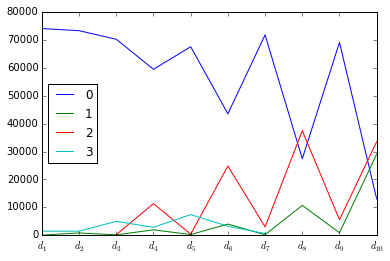

In [15]:
#plt.title("Verkauf der optimalen Politik")
#plt.ylabel("p[j](t)")
#plt.xlabel("t")
plt.figure()
df_Series.plot();